In [1]:
"""Gradient descent."""

'Gradient descent.'

In [ ]:
# fmt: off
import matplotlib.pyplot as plt
import numpy as np
from numpy.typing import NDArray
# импортируем фукцию diff() и
from sympy import diff
# превратим x и y в символы
from sympy.abc import x, y

# fmt: on

### Функция нескольких переменных

$$ f(w_1, w_2) = w_1^2 + w_2^2 $$

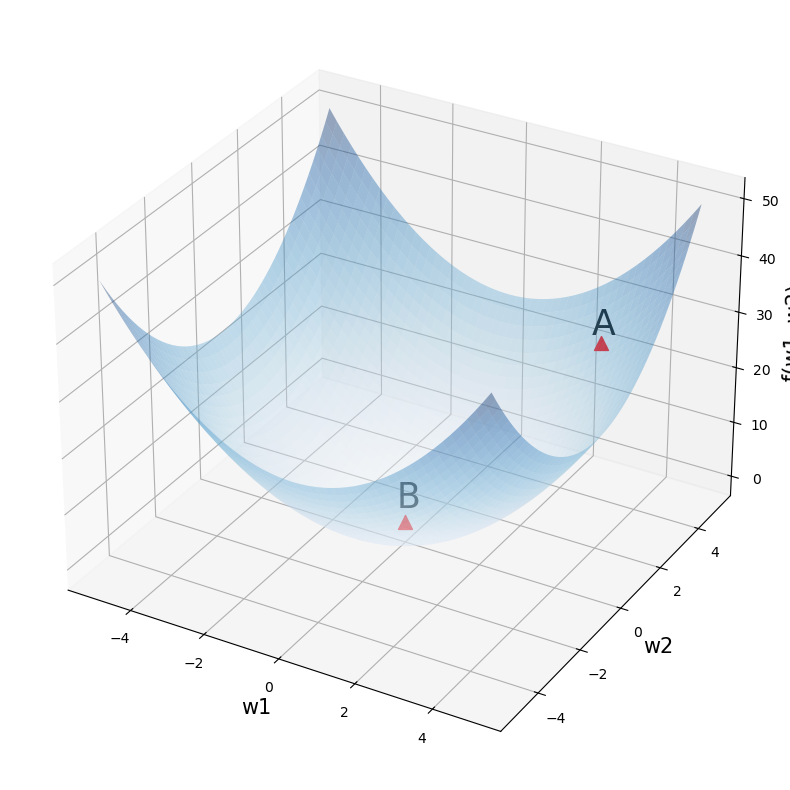

In [14]:
def plot_3d_surface() -> None:
    """Plot 3D surface of quadratic function with marked points A and B."""
    # установим размер графика
    figure = plt.figure(figsize=(12, 10))

    # создадим последовательность из 1000 точек в интервале от -5 до 5
    # для осей w1 и w2
    weight1 = np.linspace(-5, 5, 1000)
    weight2 = np.linspace(-5, 5, 1000)

    # создадим координатную плоскость из осей w1 и w2
    weight1, weight2 = np.meshgrid(weight1, weight2)

    # пропишем функцию
    func_val = weight1**2 + weight2**2

    # создадим трехмерное пространство
    axes = figure.add_subplot(projection="3d")

    # выведем график функции, alpha задает прозрачность
    axes.plot_surface(weight1, weight2, func_val, alpha=0.4, cmap="Blues")

    # выведем точку A с координатами (3, 4, 25) и подпись к ней
    axes.scatter(3, 4, 25, c="red", marker="^", s=100)
    axes.text(3, 3.5, 28, "A", size=25)

    # аналогично выведем точку B с координатами (0, 0, 0)
    axes.scatter(0, 0, 0, c="red", marker="^", s=100)
    axes.text(0, -0.4, 4, "B", size=25)

    # укажем подписи к осям
    axes.set_xlabel("w1", fontsize=15)
    axes.set_ylabel("w2", fontsize=15)
    axes.set_zlabel("f(w1, w2)", fontsize=15)

    # выведем результат
    plt.show()


plot_3d_surface()

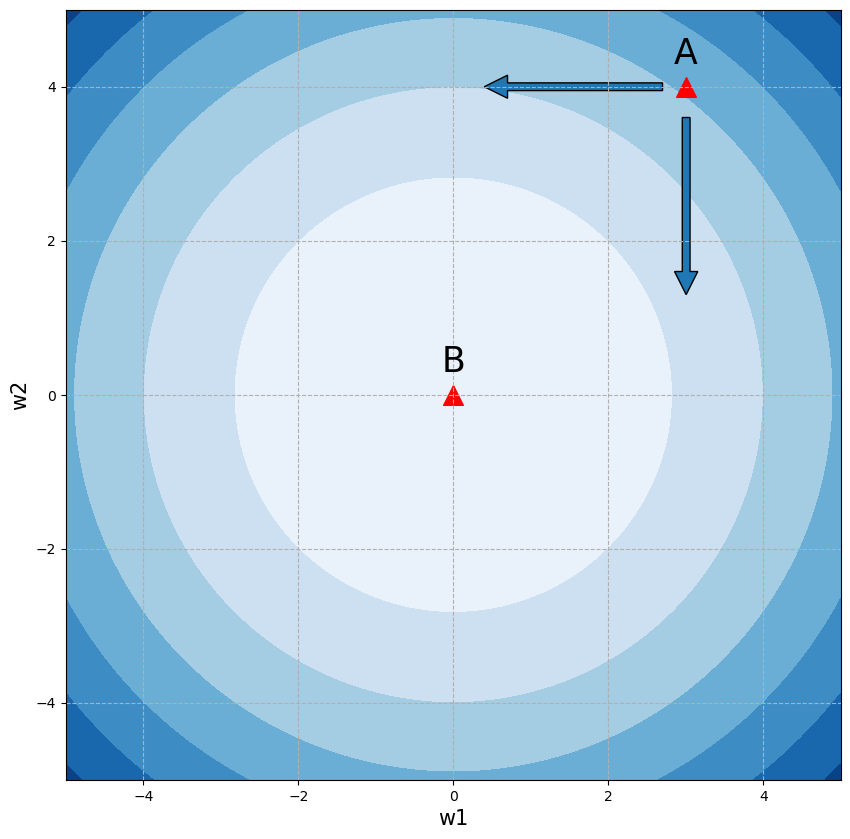

In [ ]:
def plot_contour_with_points() -> None:
    """Plot contour of quadratic function with points and gradient arrows."""
    # установим размер графика
    _, axes = plt.subplots(figsize=(10, 10))

    # создадим последовательность из 100 точек в интервале от -5 до 5
    # для осей w1 и w2
    weight1 = np.linspace(-5.0, 5.0, 100)
    weight2 = np.linspace(-5.0, 5.0, 100)

    # создадим координатную плоскость из осей w1 и w2
    weight1, weight2 = np.meshgrid(weight1, weight2)

    # пропишем функцию
    contour_values = weight1**2 + weight2**2

    # построим изолинии (линии уровня)
    plt.contourf(weight1, weight2, contour_values, cmap="Blues")

    # выведем точку А с координатами на плоскости (3, 4)
    axes.scatter(3, 4, c="red", marker="^", s=200)
    axes.text(2.85, 4.3, "A", size=25)

    # и точку B с координатами (0, 0)
    axes.scatter(0, 0, c="red", marker="^", s=200)
    axes.text(-0.15, 0.3, "B", size=25)

    # укажем подписи к осям
    axes.set_xlabel("w1", fontsize=15)
    axes.set_ylabel("w2", fontsize=15)

    # а также стрелки направления изменений вдоль w1 и w2
    axes.arrow(2.7, 4, -2, 0, width=0.1, head_length=0.3)
    axes.arrow(3.005, 3.6, 0, -2, width=0.1, head_length=0.3)

    # создадим сетку в виде прерывистой черты
    plt.grid(linestyle="--")

    # выведем результат
    plt.show()


plot_contour_with_points()

Линии уровня(мат. анализ) показывают ландшафт функции.

### Частная производная
Сечение многомерной функции

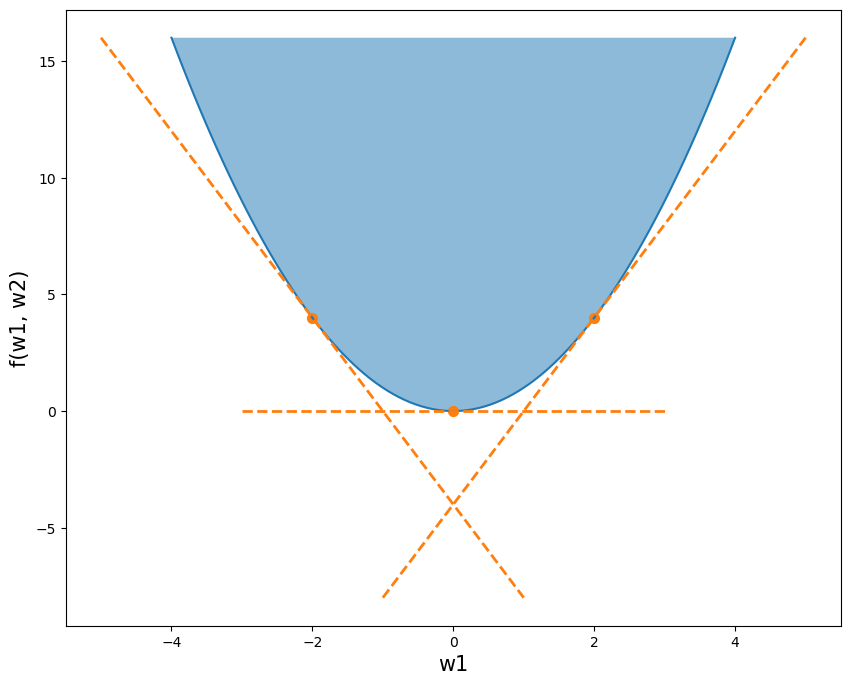

In [ ]:
def plot_parabola_with_tangent_lines() -> None:
    """Plot a parabola with tangent lines at x=-2,0,2."""
    # set figure size in inches
    plt.figure(figsize=(10, 8))

    def parabola(weight: NDArray[np.float64]) -> NDArray[np.float64]:
        return weight**2

    def derivative(weight: NDArray[np.float64]) -> NDArray[np.float64]:
        return 2 * weight

    def tangent_line(
        weight: NDArray[np.float64], point_x: np.float64, point_y: np.float64
    ) -> NDArray[np.float64]:
        """Calculate tangent line using point-slope form."""
        derivative_val = derivative(np.array([point_x])[0])
        return derivative_val * (weight - point_x) + point_y

    # create x coordinates sequence for parabola
    weights = np.array(np.linspace(-4, 4, 100), dtype=np.float64)

    # plot parabola
    plt.plot(weights, parabola(weights))

    # fill area under curve with blue color at 0.5 alpha
    plt.fill_between(weights, parabola(weights), 16, alpha=0.5)

    # iterate through points -2, 0, 2 on x axis
    for point_x_int in range(-2, 3, 2):
        point_x = np.float64(point_x_int)
        # calculate corresponding y coordinates
        point_y = parabola(np.array([point_x], dtype=np.float64))[0]

        # define x range for tangent lines
        weight_range: NDArray[np.float64] = np.array(
            np.linspace(point_x - 3, point_x + 3, 9), dtype=np.float64
        )

        # plot tangent lines
        plt.plot(
            weight_range,
            tangent_line(weight_range, point_x, point_y),
            "C1--",
            linewidth=2,
        )

        # plot points of tangency
        plt.scatter(point_x, point_y, color="C1", s=50)

    # set axis labels
    plt.xlabel("w1", fontsize=15)
    plt.ylabel("f(w1, w2)", fontsize=15)

    # show plot
    plt.show()


plot_parabola_with_tangent_lines()

Взятие частных производных с помощью SymPy

In [13]:
# напишем функцию, которую хотим дифференцировать
f_def = x**2 + y**2

# найдем частную производную по первой переменной
diff(f_def, x)

2*x

### Метод градиентного спуска

Градиент показывает направление скорейшего роста функции. Задача - уменьшить. Градиент это вектор частных производных. Для оптимизации нам нужен анти-градиент.

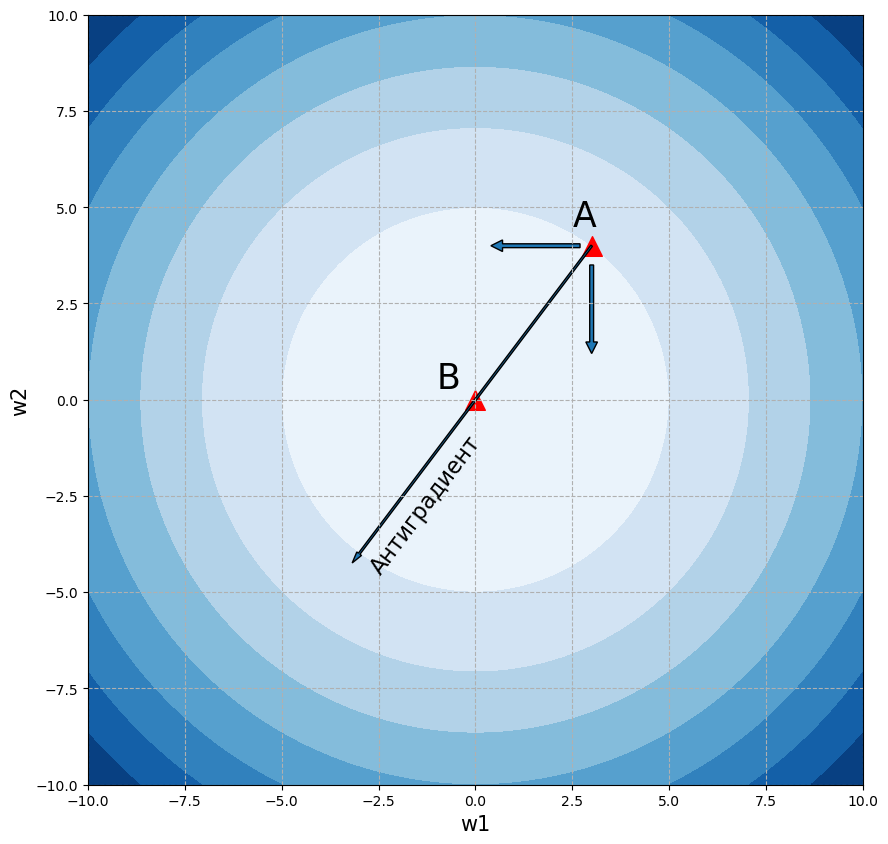

In [ ]:
def plot_gradient_descent_example(figsize: tuple[int, int] = (10, 10)) -> None:
    """Plot contour plot showing gradient descent direction with points."""
    # установим размер графика
    _, axes = plt.subplots(figsize=figsize)

    # создадим последовательность из 100 точек в интервале от -10 до 10
    # для осей w1 и w2
    weight1 = np.linspace(-10.0, 10.0, 100)
    weight2 = np.linspace(-10.0, 10.0, 100)

    # создадим координатную плоскость из осей w1 и w2
    weight1, weight2 = np.meshgrid(weight1, weight2)

    # пропишем функцию
    contour_values = weight1**2 + weight2**2

    # построим изолинии (линии уровня)
    plt.contourf(weight1, weight2, contour_values, cmap="Blues")

    # выведем точку А с координатами на плоскости (3, 4)
    axes.scatter(3, 4, c="red", marker="^", s=200)
    axes.text(2.5, 4.5, "A", size=25)

    # и точку B с координатами (0, 0)
    axes.scatter(0, 0, c="red", marker="^", s=200)
    axes.text(-1, 0.3, "B", size=25)

    # укажем подписи к осям
    axes.set_xlabel("w1", fontsize=15)
    axes.set_ylabel("w2", fontsize=15)

    # а также стрелки направления изменений вдоль w1 и w2
    axes.arrow(2.7, 4, -2, 0, width=0.1, head_length=0.3)
    axes.arrow(3, 3.5, 0, -2, width=0.1, head_length=0.3)

    # выведем вектор антиградиента с направлением (-6, -8)
    axes.arrow(3, 4, -6, -8, width=0.05, head_length=0.3)
    axes.text(-2.8, -4.5, "Антиградиент", rotation=53, size=16)

    # создадим сетку в виде прерывистой черты
    plt.grid(linestyle="--")

    # выведем результат
    plt.show()


plot_gradient_descent_example()

In [ ]:
# пропишем функцию потерь


def objective(w1_val: float, w2_val: float) -> float:
    """Calculate loss function as sum of squares."""
    return w1_val**2 + w2_val**2


# а также производную по первой


def partial_1(w1_val: float) -> float:
    """Calculate partial derivative with respect to w1."""
    return 2.0 * w1_val


# и второй переменной


def partial_2(w2_val: float) -> float:
    """Calculate partial derivative with respect to w2."""
    return 2.0 * w2_val

In [ ]:
# пропишем изначальные веса
w1, w2 = 3, 4

# количество итераций
iterations_count = 100

# и скорость обучения
learning_rate = 0.05